# Problem Statement

BC Finance company seeks to streamline its loan eligibility assessment process by implementing real-time automation.The task at hand involves leveraging a partial dataset provided by the company to devise an algorithm or model that accurately identifies distinct customer segments eligible for targeted loan offerings.

# Getting the system ready and loading the data

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [23]:
#Import raw data 
bl_csv= pd.read_csv(r"raw_data.csv")
bl_csv.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [24]:
#Import validation data
bv_csv= pd.read_csv(r"validation.csv")
bv_csv.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [25]:
# Convert raw data to DataFrame
df = pd.DataFrame(data = bl_csv)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Missing value and outlier treatment

In [26]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            480 non-null    object 
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    object 
 5   Self_Employed      480 non-null    object 
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 52.5+ KB


In [27]:
#remove outliers
for col in ["ApplicantIncome","CoapplicantIncome","LoanAmount"]:
    low, high = df[col].quantile([0.1,0.9])
    outliers = df[col].between(low,high)
    df = df.loc[outliers]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 279 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            279 non-null    object 
 1   Gender             279 non-null    object 
 2   Married            279 non-null    object 
 3   Dependents         279 non-null    object 
 4   Education          279 non-null    object 
 5   Self_Employed      279 non-null    object 
 6   ApplicantIncome    279 non-null    int64  
 7   CoapplicantIncome  279 non-null    float64
 8   LoanAmount         279 non-null    float64
 9   Loan_Amount_Term   279 non-null    float64
 10  Credit_History     279 non-null    float64
 11  Property_Area      279 non-null    object 
 12  Loan_Status        279 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 30.5+ KB


# Exploratory Data Analysis

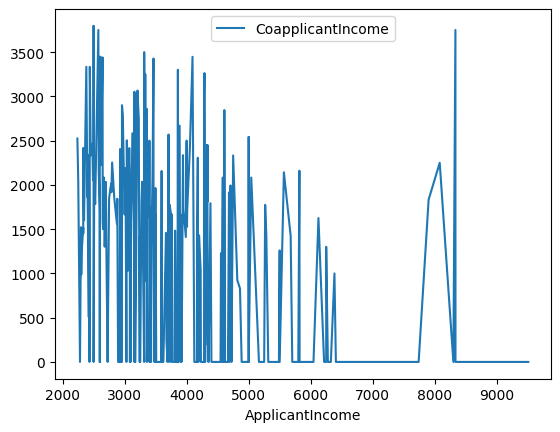

In [45]:
# Changed to line graph to better display data
(
    df.sort_values(by='ApplicantIncome', ascending=True)
).plot(
    kind='line', 
    x='ApplicantIncome', 
    y='CoapplicantIncome'
);

In [29]:
from scipy.stats import entropy

# Assuming df is your DataFrame
for col in df.columns:
    ln = col + ':'
    print(f'Entropy of {ln:<20}  {round(entropy(df[col].value_counts(normalize=True), base=np.e),7)}')

print(f'Entropy of {"Value_Counts:":<21} {round(entropy(df.value_counts(normalize=True), base=np.e),7)}')


Entropy of Loan_ID:              5.6312118
Entropy of Gender:               0.453434
Entropy of Married:              0.6459925
Entropy of Dependents:           1.1416009
Entropy of Education:            0.5512451
Entropy of Self_Employed:        0.3413132
Entropy of ApplicantIncome:      5.4144272
Entropy of CoapplicantIncome:    3.4373395
Entropy of LoanAmount:           4.291278
Entropy of Loan_Amount_Term:     0.5699707
Entropy of Credit_History:       0.4236405
Entropy of Property_Area:        1.0879573
Entropy of Loan_Status:          0.6117726
Entropy of Value_Counts:         5.6312118


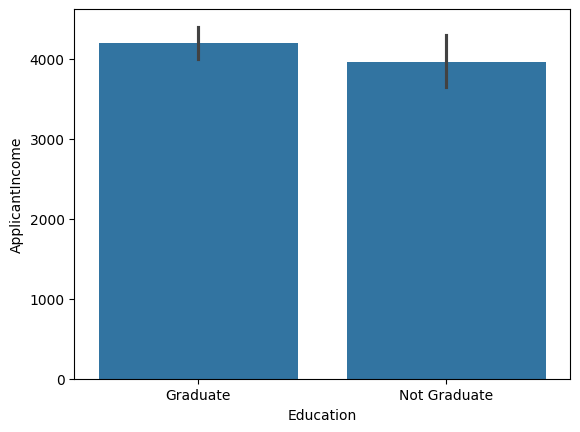

In [30]:
sns.barplot(data=df.sort_values(by='Loan_ID', ascending=True),x='Education',y='ApplicantIncome');

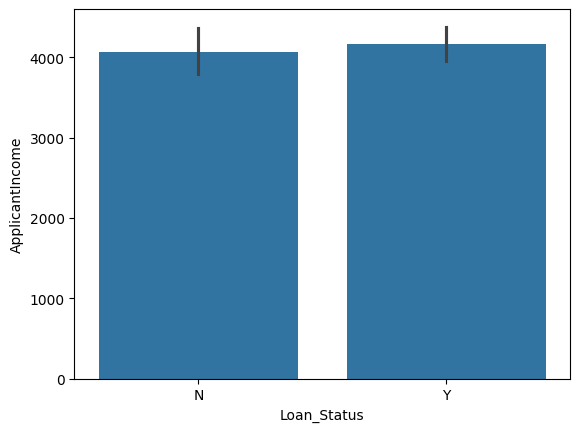

In [31]:
sns.barplot(data=df.sort_values(by='Loan_ID', ascending=True),x='Loan_Status',y='ApplicantIncome');

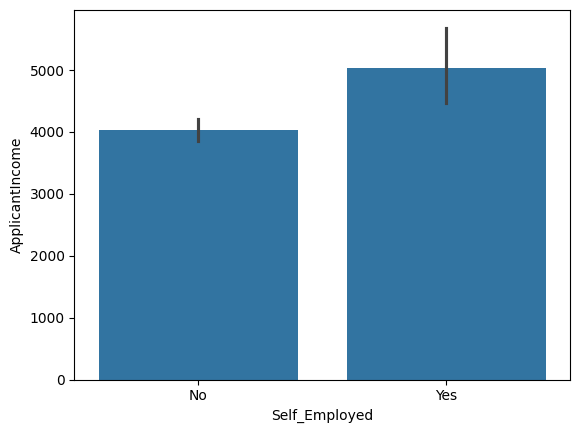

In [32]:
sns.barplot(data=df.sort_values(by='Loan_ID', ascending=True),x='Self_Employed',y='ApplicantIncome');

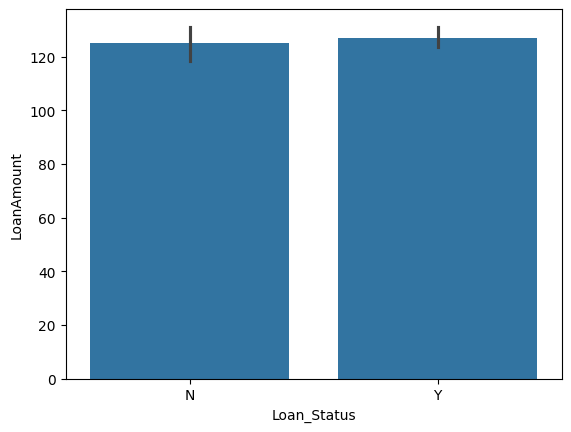

In [33]:
sns.barplot(data=df.sort_values(by='Loan_ID', ascending=True),x='Loan_Status',y='LoanAmount');

In [34]:
def pandas_entropy(column, base=None):
    vc = pd.Series(column).value_counts(normalize=True, sort=False)
    base = np.e if base is None else base
    return -(vc * np.log(vc)/np.log(base)).sum()

In [35]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N


In [36]:
df["Gender"] = df["Gender"].apply(lambda x: 1 if x == "Male" else 0)
df["Married"] = df["Married"].apply(lambda x: 1 if x == "Yes" else 0)
df["Education"] = df["Education"].apply(lambda x: 1 if x == "Graduate" else 0)
df["Self_Employed"] = df["Self_Employed"].apply(lambda x: 1 if x == "Yes" else 0)

In [37]:
df[["Gender", "Married", "Education", "Self_Employed"]].head()

,Gender,Married,Education,Self_Employed
1,1,1,1,0
3,1,1,0,0
4,1,0,1,0
6,1,1,0,0
7,1,1,1,0


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and "target" is the target variable
# Drop the ID column
X = df.drop(["Loan_Status", "Loan_ID"], axis=1)
y = df["Loan_Status"]

# Convert the '3+' values to a numerical format

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 279 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            279 non-null    object 
 1   Gender             279 non-null    int64  
 2   Married            279 non-null    int64  
 3   Dependents         279 non-null    object 
 4   Education          279 non-null    int64  
 5   Self_Employed      279 non-null    int64  
 6   ApplicantIncome    279 non-null    int64  
 7   CoapplicantIncome  279 non-null    float64
 8   LoanAmount         279 non-null    float64
 9   Loan_Amount_Term   279 non-null    float64
 10  Credit_History     279 non-null    float64
 11  Property_Area      279 non-null    object 
 12  Loan_Status        279 non-null    object 
dtypes: float64(4), int64(5), object(4)
memory usage: 30.5+ KB


In [40]:
Ydf =df["Loan_Status"]
Ydf

1      N
3      Y
4      Y
6      Y
7      N
      ..
606    Y
607    Y
608    Y
612    Y
613    N
Name: Loan_Status, Length: 279, dtype: object